# Random Lattice Generators Are Not Bad


In [8]:
import qmcpy as qp
import numpy as np  #basic numerical routines in Python
import time  #timing routines
from matplotlib import pyplot;  #plotting

pyplot.rc('font', size=16)  #set defaults so that the plots are readable
pyplot.rc('axes', titlesize=16)
pyplot.rc('axes', labelsize=16)
pyplot.rc('xtick', labelsize=16)
pyplot.rc('ytick', labelsize=16)
pyplot.rc('legend', fontsize=16)
pyplot.rc('figure', titlesize=16)

#a helpful plotting method to show increasing numbers of points
def plot_successive_points(distrib,ld_name,first_n=64,n_cols=1,pt_clr='bgkcmy',
                           xlim=[0,1],ylim=[0,1],coord1 = 0,coord2 = 1):
  fig,ax = pyplot.subplots(nrows=1,ncols=n_cols,figsize=(5*n_cols,5.5))
  if n_cols==1: ax = [ax]
  last_n = first_n*(2**n_cols)
  points = distrib.gen_samples(n=last_n)
  for i in range(n_cols):
    n = first_n
    nstart = 0
    for j in range(i+1):
      n = first_n*(2**j)
      ax[i].scatter(points[nstart:n,coord1],points[nstart:n,coord2],color=pt_clr[j])
      nstart = n
    ax[i].set_title('n = %d'%n)
    ax[i].set_xlim(xlim); ax[i].set_xticks(xlim); ax[i].set_xlabel('$x_{i,%d}$'%(coord1+1))
    ax[i].set_ylim(ylim); ax[i].set_yticks(ylim); ax[i].set_ylabel('$x_{i,%d}$'%(coord2+1))
    ax[i].set_aspect((xlim[1]-xlim[0])/(ylim[1]-ylim[0]))
  fig.suptitle('%s Points'%ld_name)

## Lattice Declaration and the gen_samples function

In [9]:
lat = qp.Lattice()
help(lat.__init__)

Help on method __init__ in module qmcpy.discrete_distribution.lattice.lattice:

__init__(dimension=1, randomize=True, order='natural', seed=None, generating_vector='lattice_vec.3600.20.npy', d_max=None, m_max=None) method of qmcpy.discrete_distribution.lattice.lattice.Lattice instance
    Args:
        dimension (int or ndarray): dimension of the generator.
            If an int is passed in, use sequence dimensions [0,...,dimensions-1].
            If a ndarray is passed in, use these dimension indices in the sequence.
        randomize (bool): If True, apply shift to generated samples.
            Note: Non-randomized lattice sequence includes the origin.
        order (str): 'linear', 'natural', or 'mps' ordering.
        seed (None or int or numpy.random.SeedSeq): seed the random number generator for reproducibility
        generating_vector (ndarray, str or int): generating matrix or path to generating matrices.
            ndarray should have shape (d_max).
            a string g

In [10]:
help(lat.gen_samples)

Help on method gen_samples in module qmcpy.discrete_distribution.lattice.lattice:

gen_samples(n=None, n_min=0, n_max=8, warn=True, return_unrandomized=False) method of qmcpy.discrete_distribution.lattice.lattice.Lattice instance
    Generate lattice samples
    
    Args:
        n (int): if n is supplied, generate from n_min=0 to n_max=n samples.
            Otherwise use the n_min and n_max explicitly supplied as the following 2 arguments
        n_min (int): Starting index of sequence.
        n_max (int): Final index of sequence.
        return_unrandomized (bool): return samples without randomization as 2nd return value.
            Will not be returned if randomize=False.
    
    Returns:
        ndarray: (n_max-n_min) x d (dimension) array of samples
    
    Note:
        Lattice generates in blocks from 2**m to 2**(m+1) so generating
        n_min=3 to n_max=9 requires necessarily produces samples from n_min=2 to n_max=16
        and automatically subsets. May be inefficient

### Driver code

In [11]:
lat = qp.Lattice(dimension = 2,randomize= True, generating_vector=21, seed = 120) 
print("Basic information of the lattice:")
print(lat)

print("\nA sample lattice generated by the random generating vector: ")

n = 16 #number of points in the sample
print(lat.gen_samples(n))

Basic information of the lattice:
Lattice (DiscreteDistribution Object)
    d               2^(1)
    dvec            [0 1]
    randomize       1
    order           natural
    gen_vec         [     1 249531]
    entropy         120
    spawn_key       ()

A sample lattice generated by the random generating vector: 
[[0.34548142 0.46736834]
 [0.84548142 0.96736834]
 [0.59548142 0.21736834]
 [0.09548142 0.71736834]
 [0.47048142 0.84236834]
 [0.97048142 0.34236834]
 [0.72048142 0.59236834]
 [0.22048142 0.09236834]
 [0.40798142 0.15486834]
 [0.90798142 0.65486834]
 [0.65798142 0.90486834]
 [0.15798142 0.40486834]
 [0.53298142 0.52986834]
 [0.03298142 0.02986834]
 [0.78298142 0.27986834]
 [0.28298142 0.77986834]]


### Plots of lattices

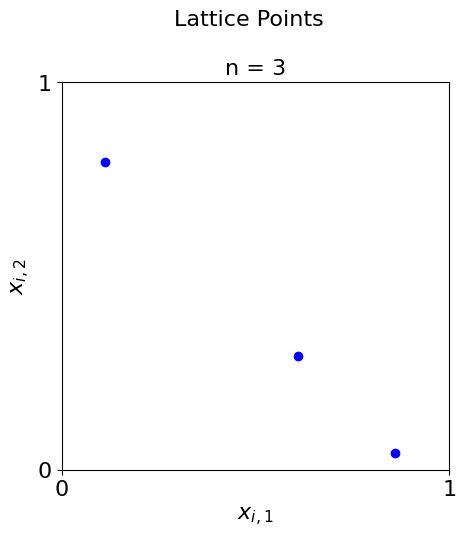

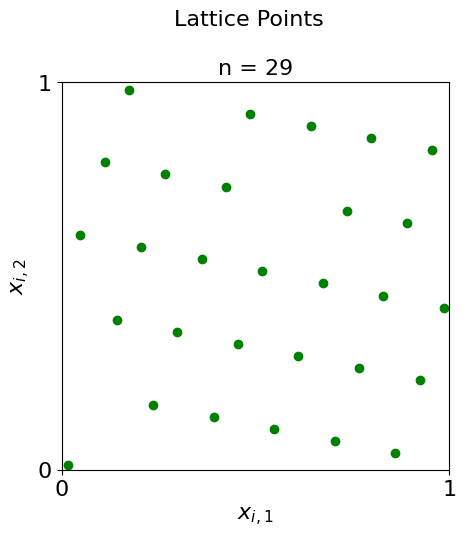

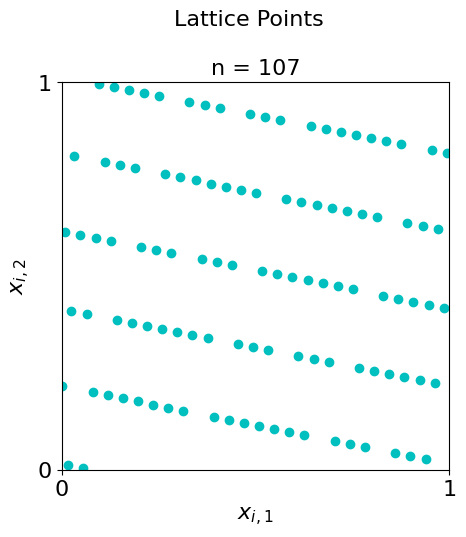

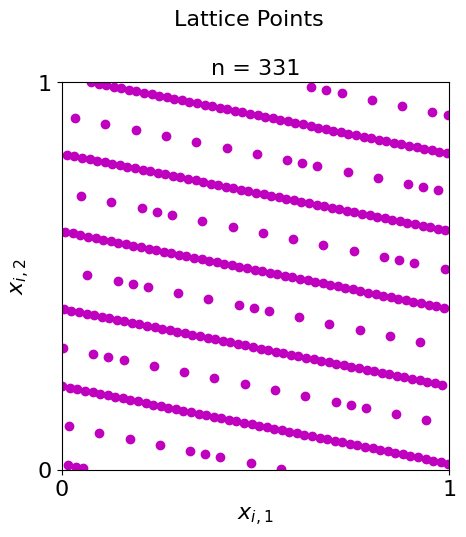

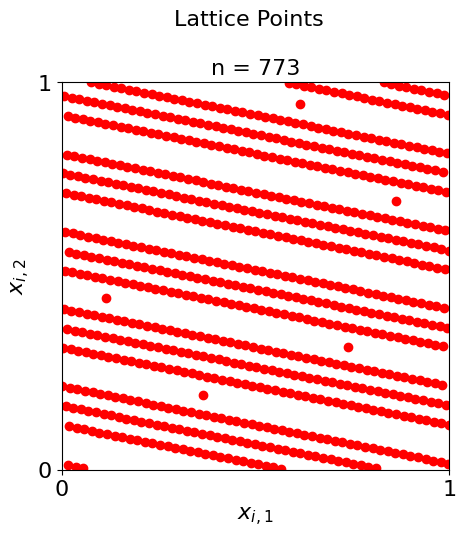

In [12]:
#Here the sample sizes are prime numbers
lat = qp.Lattice(dimension=2,generating_vector= 16,seed = 136)
    
primes = [3,29,107,331,773]

for i in range(0,5):
    plot_successive_points(distrib = lat,ld_name = "Lattice",first_n=primes[i],pt_clr="bgcmr"[i])


## Integration


### Runtime comparison bewteen radnom generator and hard-conded generator

In [13]:
import warnings
warnings.simplefilter('ignore')

d = 5  #coded as parameters so that 
tol = 1E-3 #you can change here and propagate them through this example

data_random = qp.CubQMCLatticeG(qp.Keister(qp.Gaussian(qp.Lattice(d,generating_vector = 26), mean = 0, covariance = 1/2)), abs_tol = tol).integrate()[1]
data_default = qp.CubQMCLatticeG(qp.Keister(qp.Gaussian(qp.Lattice(d), mean = 0, covariance = 1/2)),  abs_tol = tol).integrate()[1]
print("Integration data from a random lattice generator:")
print(data_random)
print("\nIntegration data from the default lattice generator:")
print(data_default)



Integration data from a random lattice generator:
LDTransformData (AccumulateData Object)
    solution        1.135
    comb_bound_low  1.135
    comb_bound_high 1.136
    comb_flags      1
    n_total         2^(17)
    n               2^(17)
    time_integrate  0.699
CubQMCLatticeG (StoppingCriterion Object)
    abs_tol         0.001
    rel_tol         0
    n_init          2^(10)
    n_max           2^(35)
Keister (Integrand Object)
Gaussian (TrueMeasure Object)
    mean            0
    covariance      2^(-1)
    decomp_type     PCA
    transform       Gaussian (TrueMeasure Object)
                       mean            0
                       covariance      2^(-1)
                       decomp_type     PCA
Lattice (DiscreteDistribution Object)
    d               5
    dvec            [0 1 2 3 4]
    randomize       1
    order           natural
    gen_vec         [       1   607017 14059869  8800807 25545535]
    entropy         312780429763724881355388599355841706663
    spa

### Mean vs. Median as a function of the sample size plot


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24


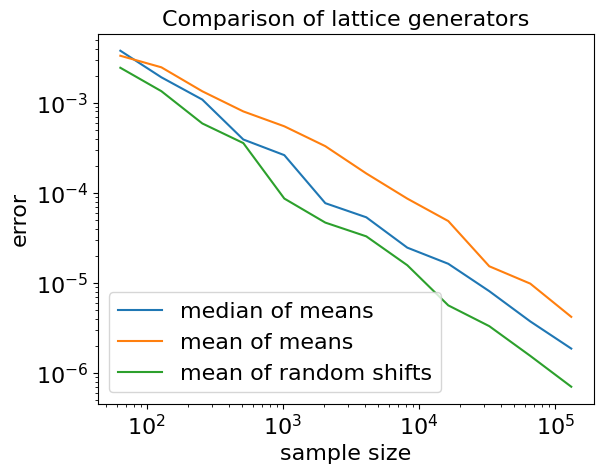

In [14]:
#mean vs. median plot
import qmcpy as qp
import numpy as np
import matplotlib.pyplot as plt



d = 2
N_min = 6
N_max = 18
N_list = 2**np.arange(N_min,N_max)
r = 11
num_trials = 25


error_median = np.zeros(N_max - N_min) 
error_mean = np.zeros(N_max - N_min) 
error_mean_onegen = np.zeros(N_max - N_min) 
for i in range(num_trials):
    y_median = []
    y_mean = []
    y_mean_one_gen = []
    print(i)
    list_of_keister_objects_random = []
    list_of_keister_objects_default = []
    y_randomized_list = []
    y_default_list = []
    for k in range(r):
        lattice = qp.Lattice(generating_vector = 26,dimension=d)
        keister = qp.Keister(lattice)
        list_of_keister_objects_random.append(keister)
        x = keister.discrete_distrib.gen_samples(N_list.max())
        y = keister.f(x)
        y_randomized_list.append(y)
        keister = qp.Keister(qp.Lattice(d))
        list_of_keister_objects_default.append(keister)
        x = keister.discrete_distrib.gen_samples(N_list.max())
        y = keister.f(x)    
        y_default_list.append(y) 
            
    for N in N_list:

        y_median.append(np.median([np.mean(y[:N]) for y in y_randomized_list]))
        y_mean_one_gen.append(np.mean([np.mean(y[:N]) for y in y_default_list]))
        y_mean.append(np.mean([np.mean(y[:N]) for y in y_randomized_list]))

    answer = keister.exact_integ(d)
    error_median += abs(answer-y_median)
    error_mean += abs(answer-y_mean)
    error_mean_onegen += abs(answer-y_mean_one_gen)

error_median /= num_trials
error_mean /= num_trials
error_mean_onegen /= num_trials

plt.loglog(N_list,error_median,label = "median of means")
plt.loglog(N_list,error_mean,label = "mean of means")
plt.loglog(N_list,error_mean_onegen,label = "mean of random shifts")
plt.xlabel("sample size")
plt.ylabel("error")
plt.title("Comparison of lattice generators")
plt.legend()
plt.savefig("./meanvsmedian.png")


